In [1]:
import pandas as pd
## load the dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [2]:
## import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
##looking at the top 5 rows
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
## statistical summary
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
## information on dataframe
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


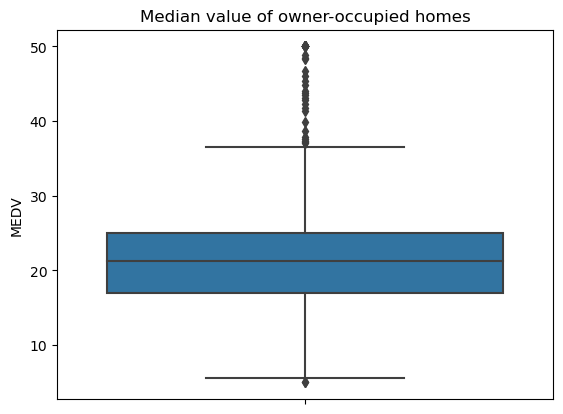

In [6]:
## Create a boxplot for the Meadian Value of owner-occupied homes
ax = sns.boxplot(y = "MEDV", data = boston_df)
ax.set_title("Median value of owner-occupied homes")
plt.show()

#### Explanation: The median value of owner occupied homes is has a range from less than USD10,000 to approximately USD50,000.

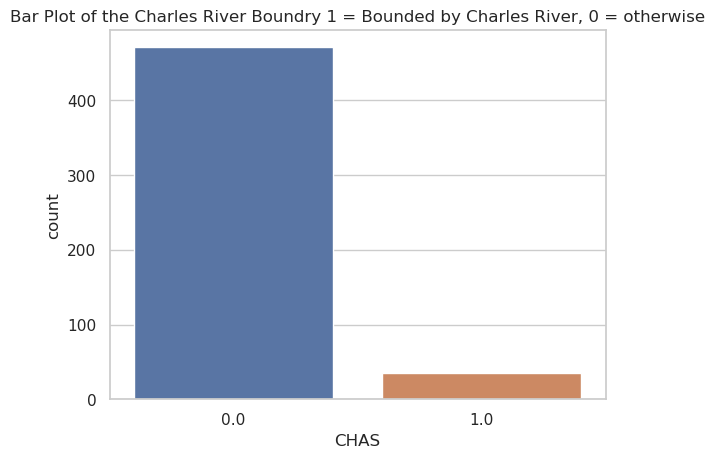

In [8]:
## bar plot of the Charles River variable where 1 is bounded by the Charles River and 0 otherwise

sns.set(style = "whitegrid")

ax = sns.countplot(x = 'CHAS', data = boston_df)
ax.set_title("Bar Plot of the Charles River Boundry 1 = Bounded by Charles River, 0 = otherwise")

plt.show()

#### Explanation: There are substaintially fewer properties bounded by the Charles River.  

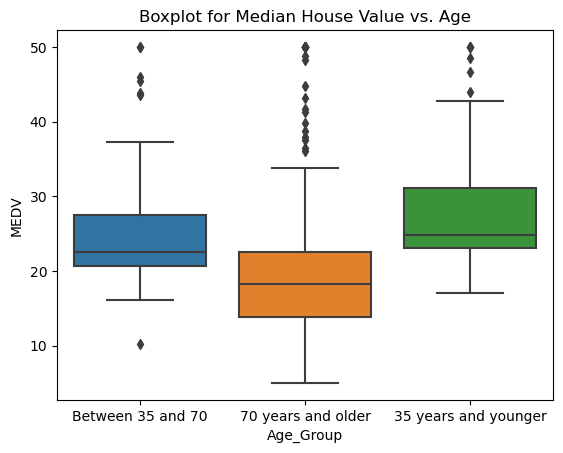

In [7]:
##create the 3 age groups
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE']< 70), 'Age_Group'] = 'Between 35 and 70'
boston_df.loc[(boston_df['AGE'] > 70), 'Age_Group'] = '70 years and older'

## box plot for MEDV vs. AGE in 3 groups age <=35, 35<age<70, age >=70
ax = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
ax.set_title('Boxplot for Median House Value vs. Age')
plt.show()

#### Explanation: From the boxplots we can determine that the 70 years and older age group as the lowest median value and the 35 years and younger group has the highest.

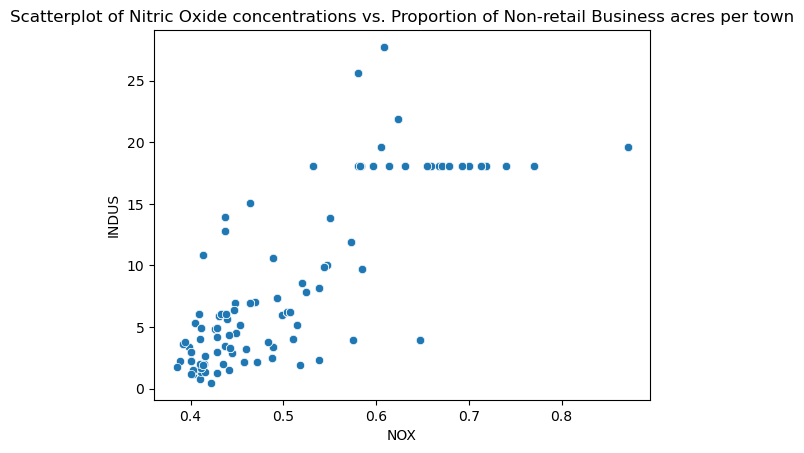

In [8]:
# Create a scatterplot of NOX vs. INDUS
ax = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
ax.set_title('Scatterplot of Nitric Oxide concentrations vs. Proportion of Non-retail Business acres per town')
plt.show()

#### Explanation: The scatterplot shows a positive relationship between the Nitric Oxide and the Proportions of the non-retail business acres per town.

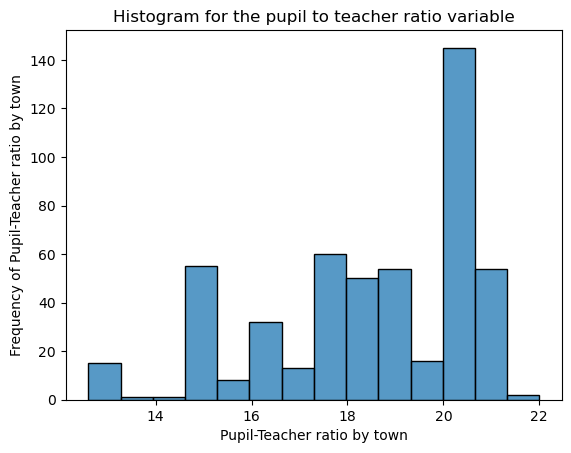

In [9]:
# Histogram of Parent Teatcher Ratio variable
ax = sns.histplot(x = 'PTRATIO', data = boston_df)
ax.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")
plt.show()

#### Explanation: The histogram shows a negative-skewed distribution with the bin of 20-22 having the highest frequency.

# TASK 5


Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

## A. Is there is significant difference in Median Value of houses bounded by the Charles River or not?

Hypothesis: 

Ho = There is no difference in Median Value of houses bounded by Charles River. 

Ha = There is a difference in Median Value of houses bounded by Charles River.

Use alpha value of 0.05

Use Levene test to check test significance and assess the equality of equal variances

In [32]:
## Use the levene test to assess the equality of equal variances with center at the mean

scipy.stats.levene(boston_df['CHAS'], boston_df['MEDV'], center = 'mean')

LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

In [33]:
## Use the levene test to assess the equality of equal variances with center at the median

scipy.stats.levene(boston_df['CHAS'], boston_df['MEDV'], center = 'median')

LeveneResult(statistic=483.51250993800966, pvalue=7.087575216458403e-88)

 For both Levene's test cnetered at the mean and median the The p-value < 0.05.
 
 Therefore we reject the null hypothesis and cannot assume equal variances when conducting the t-test.

## Hypothesis: 
Ho = There is no difference in Median Value of houses bounded by Charles River.

Ha = There is a difference in Median Value of houses bounded by Charles River.

Use alpha value of 0.05

equal_var = False (based on the p-value from Levene's Test)

In [34]:
## Determining if there is significant difference in Median Value of houses bounded by the Charles River or not?
## Hypothesis: Ho = There is no difference in Median Value of houses bounded by Charles River. 
## Ha = There is a difference in Median Value of houses bounded by Charles River.
## Use alpha value of 0.05
##equal_var = False

scipy.stats.ttest_ind(boston_df['CHAS'], boston_df['MEDV'], equal_var = False )

Ttest_indResult(statistic=-54.9210289745203, pvalue=2.752650575837329e-215)

#### Conclusion:
The p-value < 0.05 (alpha) therefore REJECT the null hypothesis.  

There is a difference in the Median Value of houses bounded by the Charles River.

## B. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

First distinguish the three age groups.

35 years and younger

Between 35 and 70 

70 years and older

In [36]:
## 3 age groups
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE']< 70), 'Age_Group'] = 'Between 35 and 70'
boston_df.loc[(boston_df['AGE'] > 70), 'Age_Group'] = '70 years and older'

In [39]:
##Create variables for 3 age groups
thirtyfive_younger = boston_df[boston_df['Age_Group'] == "35 years and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 years and older"]['MEDV']


### Hypothesis:
Ho: There is no difference in the age groups of the median value for those who own a home built prior to 1940.

Ha: There is a differnece in the age groups of the median value for those who own a home built prior to 1940.

Run the ANOVA test 

In [43]:
#use the f_oneway to find the f_statistic and the p_value
f,p = scipy.stats.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)

#print the results
print("F_statistic:{0}, p_value:{1}". format(f, p))

F_statistic:36.40764999196599, p_value:1.7105011022702984e-15


#### Conclusion: 

The p-value < 0.05 therefore we REJECT the null hypothesis.

There is a difference in in the three age groups of the median value for the owners of homes built prior to 1940.

## C. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 


### Hypothesis:

Ho: There is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).

Ha: There is a relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).

Graph a scatterplot of the relationship

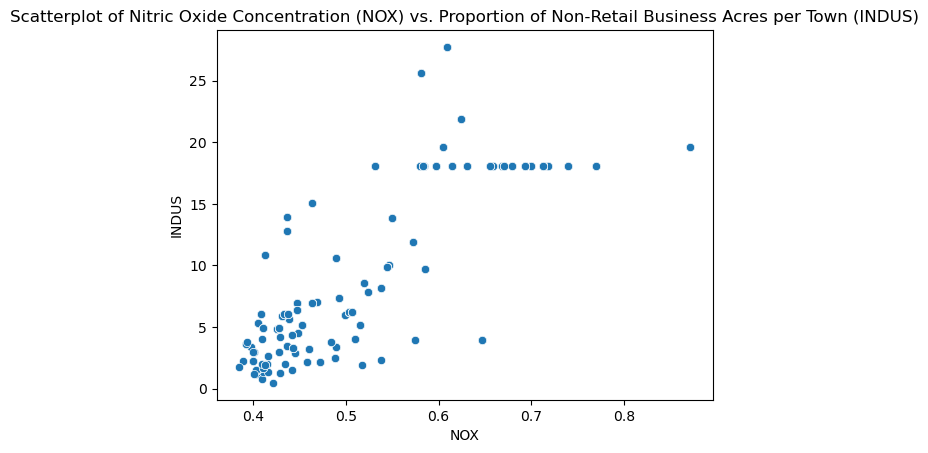

In [54]:
#scatterplot of NOX vs. INDUS
ax = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
ax.set_title("Scatterplot of Nitric Oxide Concentration (NOX) vs. Proportion of Non-Retail Business Acres per Town (INDUS)")
plt.show()

Run the Pearson Correlation

In [62]:
r, p = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("The Pearson Correlation is:{0}, p-value:{1}".format(r,p))

The Pearson Correlation is:0.7636514469209151, p-value:7.913361061238693e-98


#### Conclusion:
The p-value <0.05 therefore we REJECT the null hypothesis.

There is a relationship between the Nitric Oxide concentration and the proportion of non-retail business acres per town.

## D. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

### Hypothesis:

Ho: There is no impact of an additional weighted distnace to the five Boston employment centers (DIS) on the median value of owner occupied homes (MEDV).

Ha: There is an impact of an additional weighted distnace to the five Boston employment centers (DIS) on the median value of owner occupied homes (MEDV).


In [63]:
## X is the independent variable (DIS)
## y is the dependent variable (target) (MEDV)

X = boston_df['DIS']
y = boston_df['MEDV']

#add an intercept beta_0 to model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

#print out summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        07:01:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:

The p-value < 0.05 therefore we REJECT the null hypothesis. 

Therefore the is an impact on the median value of owner occupied homes by the weighted distance to the 5 Boston employment centers.

The R-squared value is 0.062 therefore the r is approx. 0.2489 so there is some positive relationship between the two variables.

The coefficient is positive (1.0916), therefore the impact increases.